<a href="https://colab.research.google.com/github/joadson-araujo/joadson-araujo/blob/main/artigo_undb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importando bilioteca pandas
import pandas as pd
import numpy as np

In [4]:
#lendo arquivo csv
#df = pd.read_csv('dados.csv', index_col=[0], sep=";")
df = pd.read_csv('dados.csv', sep=";")
df.head()


,rating_final,rating_tomador,rating_fundamentalista,nota_tomador,faturamento,ebit,ebitda,endividamento,margem_liquida,ROE
0,660,660,-999,54.823454,67240949.02,3127.0,8808.0,0.994137,0.012361,2.660465
1,770,770,-999,83.226819,75696101.44,12877.0,12877.0,0.554148,0.045235,0.200534
2,777,777,-999,86.094267,77447830.64,4917.0,4917.0,0.604059,0.040348,0.455611
3,666,666,666,68.848310,50452685.32,3057.0,3270.0,0.587349,0.026872,0.107406
4,666,666,666,68.848310,50452685.32,3057.0,3270.0,0.587349,0.026872,0.107406


In [5]:
df = df.drop('rating_tomador', axis=1)
df = df.drop('rating_fundamentalista', axis=1)
df.head()

,rating_final,nota_tomador,faturamento,ebit,ebitda,endividamento,margem_liquida,ROE
0,660,54.823454,67240949.02,3127.0,8808.0,0.994137,0.012361,2.660465
1,770,83.226819,75696101.44,12877.0,12877.0,0.554148,0.045235,0.200534
2,777,86.094267,77447830.64,4917.0,4917.0,0.604059,0.040348,0.455611
3,666,68.848310,50452685.32,3057.0,3270.0,0.587349,0.026872,0.107406
4,666,68.848310,50452685.32,3057.0,3270.0,0.587349,0.026872,0.107406


In [6]:
print(df.dtypes)
df.head()


rating_final        int64
nota_tomador      float64
faturamento       float64
ebit              float64
ebitda            float64
endividamento     float64
margem_liquida    float64
ROE               float64
dtype: object


,rating_final,nota_tomador,faturamento,ebit,ebitda,endividamento,margem_liquida,ROE
0,660,54.823454,67240949.02,3127.0,8808.0,0.994137,0.012361,2.660465
1,770,83.226819,75696101.44,12877.0,12877.0,0.554148,0.045235,0.200534
2,777,86.094267,77447830.64,4917.0,4917.0,0.604059,0.040348,0.455611
3,666,68.848310,50452685.32,3057.0,3270.0,0.587349,0.026872,0.107406
4,666,68.848310,50452685.32,3057.0,3270.0,0.587349,0.026872,0.107406


In [7]:
df['ebitda'] = df['ebitda'].fillna(0)
df['endividamento'] = round(df['endividamento'],3)
df['margem_liquida'] = round(df['margem_liquida'],3)
df['ROE'] = round(df['ROE'],3)
df['nota_tomador'] = round(df['nota_tomador'],3)

df.fillna(0)

,rating_final,nota_tomador,faturamento,ebit,ebitda,endividamento,margem_liquida,ROE
0,660,54.823,67240949.02,3127.0,8808.0,0.994,0.012,2.660
1,770,83.227,75696101.44,12877.0,12877.0,0.554,0.045,0.201
2,777,86.094,77447830.64,4917.0,4917.0,0.604,0.040,0.456
3,666,68.848,50452685.32,3057.0,3270.0,0.587,0.027,0.107
4,666,68.848,50452685.32,3057.0,3270.0,0.587,0.027,0.107
...,...,...,...,...,...,...,...,...
10155,666,62.116,52840720.19,-3002.0,0.0,0.810,0.012,0.112
10156,620,46.460,44650702.32,4527.0,0.0,0.831,0.031,0.199
10157,720,75.356,73784215.77,6289.0,0.0,0.829,0.054,1.332
10158,720,75.356,73784215.77,6289.0,0.0,0.829,0.054,1.332


In [14]:
df.fillna(df.mean(), inplace=True)

In [15]:
#retirando a coluna alvo
x = df.drop('rating_final', axis=1)
y = df['rating_final']


In [16]:
#importando biblioteca específica para separar dados 
from sklearn.model_selection import train_test_split

In [17]:
#separando dados treino e teste
x_treino, x_teste, y_treino, y_teste= train_test_split(x,y,test_size=0.3)

In [18]:
y_treino.shape

(7112,)

In [12]:
#instanciando o objeto -- modelo de machine learning classificação
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier()

#regr = LinearRegression()

In [19]:
#treinando o modelo (70%)
modelo.fit(x_treino, y_treino)

#regr.fit(x_treino, y_treino)
#print(regr.score(x_teste, y_teste))

#hgbm = HistGradientBoostingClassifier()

ExtraTreesClassifier()

In [20]:
import sklearn.metrics as mt


In [21]:
previsao = modelo.predict(x_teste) #pega novos dados e joga dentro do modelo treinado
previsao

array([710, 777, 720, ..., 770, 810, 666])

In [22]:
from sklearn.metrics import confusion_matrix
mc = confusion_matrix(y_teste, previsao)
mc

array([[  0,   1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   6,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 100,   4,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1, 185,   3,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2, 301,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 719,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 569,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   7, 216,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 388,   1,   1,
       

In [23]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(modelo, x_treino, y_treino, cv=10 )
print("CV average score: %.2f" % cv_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


CV average score: 0.98


In [24]:
#cálculo da acurácia
acuracia = modelo.score(x_teste, y_teste)
acuracia

0.97998687664042

In [34]:
pred_random = modelo.predict(x_teste)
pred_random2 = modelo.predict(x_treino)

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt


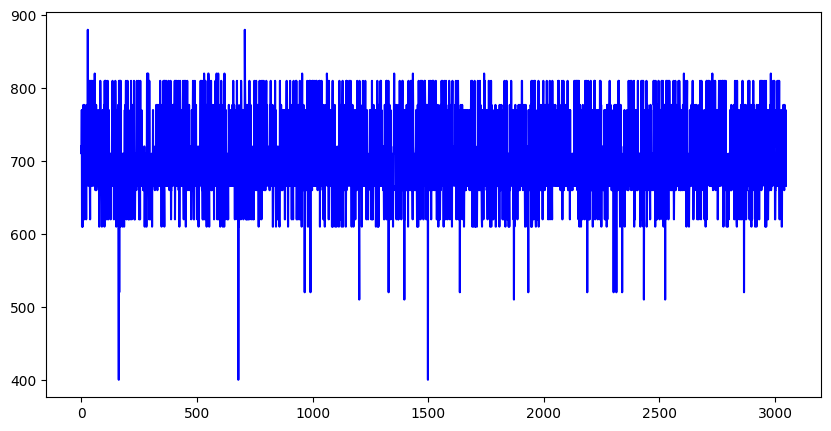

In [50]:
fig, ax = plt.subplots(figsize=(10,5))
#ax.plot(range(len(y_teste)), y_teste, 'b',label='Actual')
ax.plot(range(len(pred_random)), y_teste, 'b', label='Predicted')
plt.show()

<ipython-input-38-011554dcb9ab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_treino, hist=False, color="r", label="Actual Value")
<ipython-input-38-011554dcb9ab>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_random2, hist=False, color="b", label="Fitted Valu

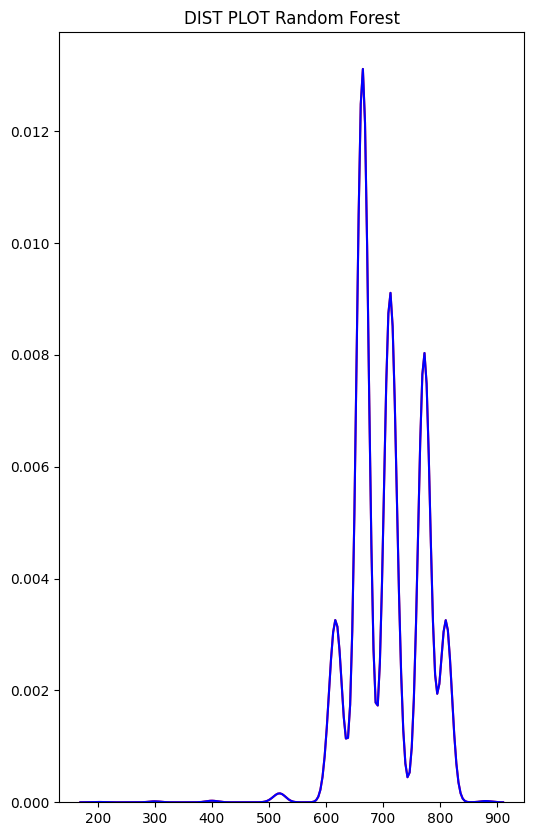

In [38]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(y_treino, hist=False, color="r", label="Actual Value")
sns.distplot(pred_random2, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('DIST PLOT Random Forest')
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.close()

In [ ]:
acuracia


0.9986876640419947

In [ ]:
import sklearn.metrics as mt


In [ ]:
previsao = modelo.predict(x_teste)

In [ ]:
#x_teste.shape
#y_teste.shape
sensibilidade = mt.recall_score(y_teste, previsao)
sensibilidade

ValueError: ignored